In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
import h5py
import os
import analysis

## Run code on qlua output

In [2]:
cfgbase = 'cl3_16_48_b6p1_m0p2450'

job_num = 16142
mom_list = []
for i in range(1, 8 + 1):
    for j in range(2, 10 + 1, 2):
        if j + 1 >= i and not (i == 8 and j == 10):
            mom_list.append([i, i, i, j])

# job_num = 16165
# mom_list = []
# for i in range(1, 16 + 1):
#     for j in range(i, 16 + 1):
#         if j % 2 == 0:
#             mom_list.append([i, i, i, j])

analysis.mom_list = mom_list
analysis.mom_str_list = [analysis.plist_to_string(p) for p in mom_list]

base = './output/' + cfgbase + '_' + str(job_num)
props, threepts = analysis.readfile(base)

V = analysis.get_hypervolume()

In [3]:
mom_list = analysis.get_mom_list()
s = 0    # TODO seed this with something random
props_boot = analysis.bootstrap(props, seed = s)
threept_boot = analysis.bootstrap(threepts, seed = s)

In [4]:
props_inv = analysis.invert_prop(props_boot)
Γ = analysis.amputate(props_inv, threept_boot)
Zq = analysis.quark_renorm(props_inv)
Γ_B, Γ_B_inv = analysis.born_term()

In [5]:
Z = analysis.get_Z(Zq, Γ, Γ_B_inv)
# Z = analysis.get_Z(Zq, Γ, Γ_B)

In [6]:
#compare with analysis_EXAMPLE.py for p2222 and cfg 200
print('Two point')
print(props_boot['p2222'][0, 0])
print('Two point inverse')
print(props_inv['p2222'][0, 0])
print('Quark renormalization')
print(Zq['p2222'])

Two point
[[[[ 1.00747164e+05-9.2370556e-14j  1.52817249e+01+1.2031049e+02j
    -4.83010586e+04+2.1567115e+04j -4.90303438e+04-4.8781703e+04j]
   [-2.41768661e+02-3.9978937e+02j  5.06350021e+01+5.3976643e+01j
     2.78603973e+02+5.3636255e+02j  2.02954819e+02+5.9992596e+02j]
   [-1.01743111e+02-3.4778656e+02j -8.02321472e+01+8.5556152e+01j
     2.88416931e+02+2.4518060e+02j -9.75028809e+02+1.4303291e+02j]]

  [[ 1.52817249e+01-1.2031049e+02j  1.00791047e+05+6.4837025e-14j
    -4.88299414e+04+4.8661328e+04j  4.83052891e+04+2.1708205e+04j]
   [ 3.47097855e+01+3.6376348e+00j -5.70164490e+01-2.9714655e+02j
     4.63170868e+02+3.3301297e+02j -2.54542145e+02+3.2249100e+02j]
   [ 2.03982029e+01-1.1234162e+02j -4.06120491e+01-3.9255643e+02j
     6.54067566e+02+9.6427948e+01j -5.29077820e+02+1.2501154e+02j]]

  [[ 4.83010586e+04+2.1567115e+04j  4.88299414e+04+4.8661328e+04j
     1.00654672e+05+7.5495166e-14j -1.00547302e+02-1.7762644e+01j]
   [-7.96330872e+02+3.4031873e+02j  7.96219206e+00-2.77

In [7]:
μ, σ = analysis.get_statistics_Z(Z)
print(μ)
print(σ)

{'p1112': (11.15956+2.0213331e-08j), 'p1114': (14.7949-5.095426e-08j), 'p1116': (16.799597-2.7667726e-09j), 'p1118': (18.743227-9.022944e-09j), 'p11110': (21.25035-1.1154128e-10j), 'p2222': (8.386724-4.7534897e-08j), 'p2224': (11.932403-1.2691699e-07j), 'p2226': (14.500598-5.356856e-08j), 'p2228': (16.74834-9.290072e-08j), 'p22210': (19.306047+5.994459e-08j), 'p3332': (7.9267187-4.9179527e-09j), 'p3334': (10.552791+3.187475e-08j), 'p3336': (13.030337+5.082355e-08j), 'p3338': (15.363123+1.1211679e-07j), 'p33310': (17.952425-8.7954305e-08j), 'p4444': (10.680389+1.9531226e-08j), 'p4446': (12.763927-1.1617558e-07j), 'p4448': (14.934317-8.833116e-08j), 'p44410': (17.432083+2.5595632e-08j), 'p5554': (12.365889+1.8316044e-08j), 'p5556': (13.902129+7.509983e-08j), 'p5558': (15.73147-1.3382083e-08j), 'p55510': (18.027077-2.1531736e-09j), 'p6666': (17.079596+1.2415046e-07j), 'p6668': (18.24483+8.067893e-08j), 'p66610': (20.165009-1.3805527e-08j), 'p7776': (24.389013-1.02890496e-07j), 'p7778': (2

<IPython.core.display.Javascript object>


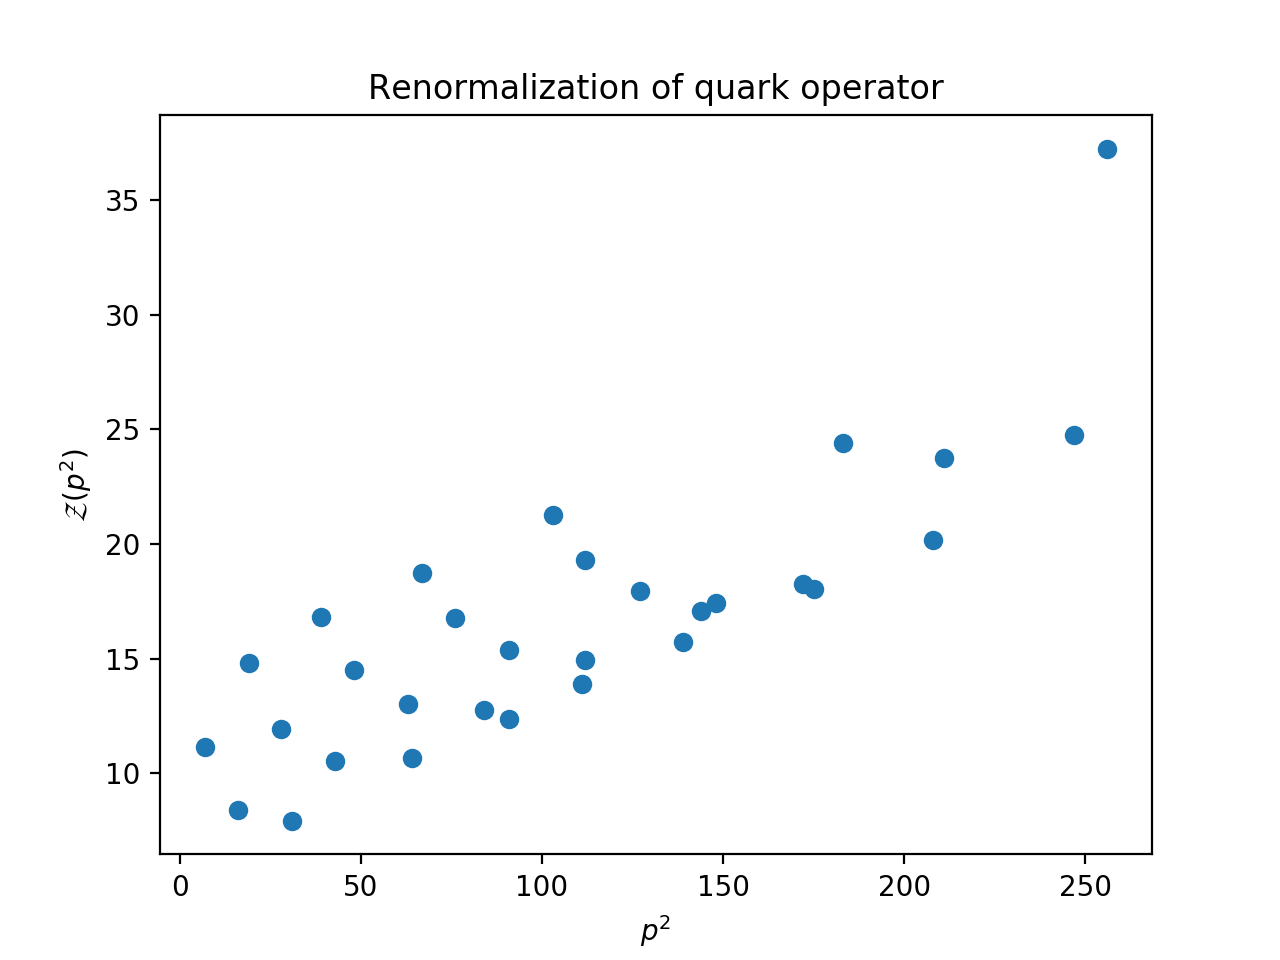

In [8]:
p_squared = np.array([np.abs(analysis.square(p)) for p in mom_list])
μ_list = np.array([μ[analysis.plist_to_string(p)] for p in mom_list])
σ_list = np.array([σ[analysis.plist_to_string(p)] for p in mom_list])
plt.figure()
plt.errorbar(p_squared, np.abs(μ_list), yerr = np.abs(σ_list), fmt = 'o')
# for i in range(len(p_squared)):
#     plt.text(p_squared[i], np.abs(μ_list[i]), analysis.mom_list[i])
plt.ylabel('$\mathcal{Z}(p^2)$')
plt.xlabel('$p^2$')
plt.title('Renormalization of quark operator')
plt.show()

In [9]:
for p, psquared in zip(mom_list, p_squared):
    print(p, psquared)

[1, 1, 1, 2] 7
[1, 1, 1, 4] 19
[1, 1, 1, 6] 39
[1, 1, 1, 8] 67
[1, 1, 1, 10] 103
[2, 2, 2, 2] 16
[2, 2, 2, 4] 28
[2, 2, 2, 6] 48
[2, 2, 2, 8] 76
[2, 2, 2, 10] 112
[3, 3, 3, 2] 31
[3, 3, 3, 4] 43
[3, 3, 3, 6] 63
[3, 3, 3, 8] 91
[3, 3, 3, 10] 127
[4, 4, 4, 4] 64
[4, 4, 4, 6] 84
[4, 4, 4, 8] 112
[4, 4, 4, 10] 148
[5, 5, 5, 4] 91
[5, 5, 5, 6] 111
[5, 5, 5, 8] 139
[5, 5, 5, 10] 175
[6, 6, 6, 6] 144
[6, 6, 6, 8] 172
[6, 6, 6, 10] 208
[7, 7, 7, 6] 183
[7, 7, 7, 8] 211
[7, 7, 7, 10] 247
[8, 8, 8, 8] 256


In [10]:
# plt.savefig('/Users/theoares/lqcd/npr_momfrac/output/cl3_16_48_b6p1_m0p2450_16142/renorm_constant_zoomed_error.pdf')

In [11]:
# cfg_list, err, means = analysis.error_analysis(Z, 4, 4)

In [12]:
# plt.figure()
# plt.scatter(cfg_list, err)
# plt.title('Error scaling at p = [2, 2, 2, 2]')
# plt.xlabel('Number configurations')
# plt.ylabel('Error')
# plt.ylim((.0004, .002))
# plt.show()